In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

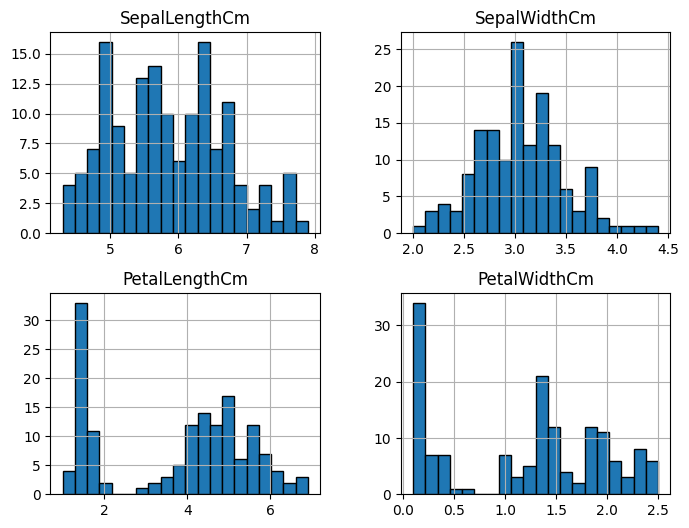

In [10]:
df.drop(columns=['Id']).hist(figsize = (8,6), bins=20,  edgecolor='black')
plt.show()

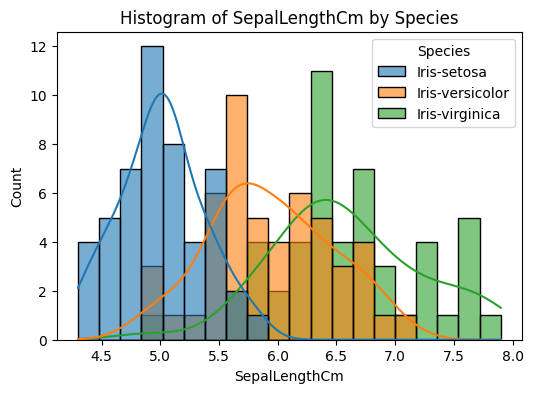

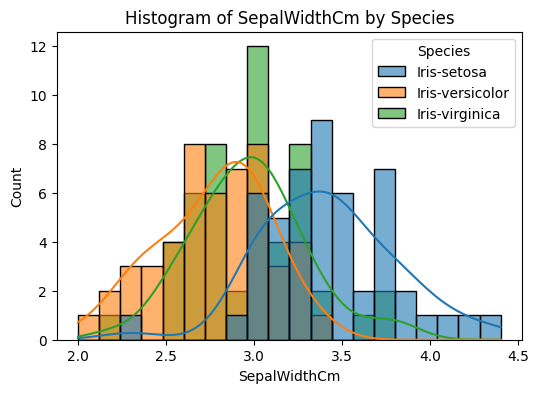

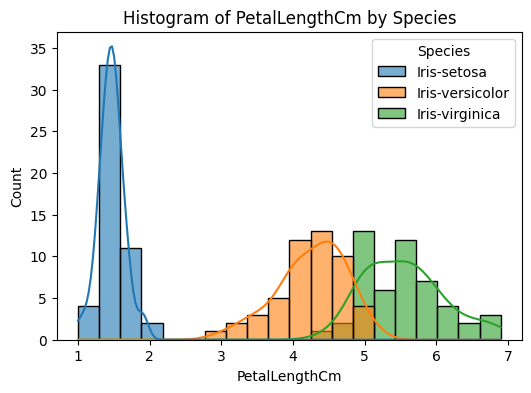

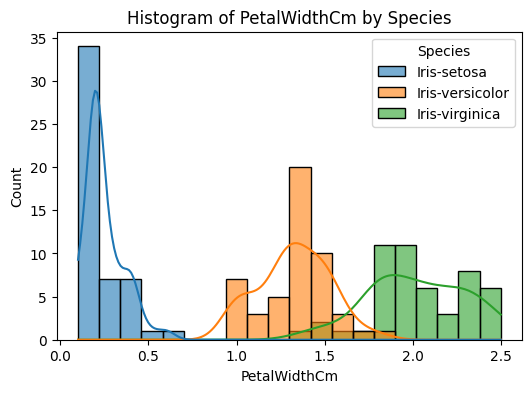

In [14]:
numerical_features = df.select_dtypes(include=['float64'])
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Species', kde=True, bins=20, alpha=0.6)
    plt.title(f"Histogram of {col} by Species")
    plt.show()


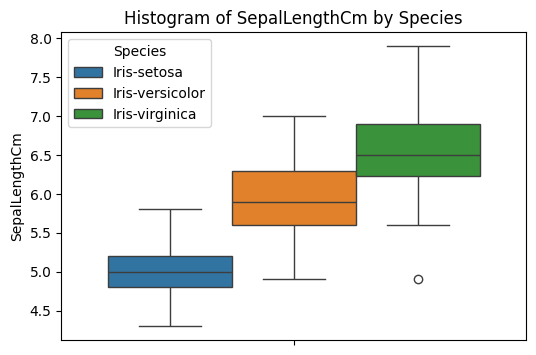

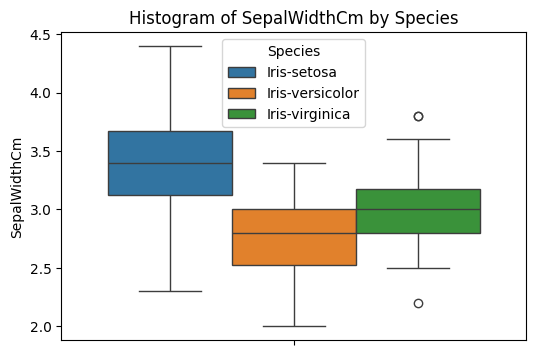

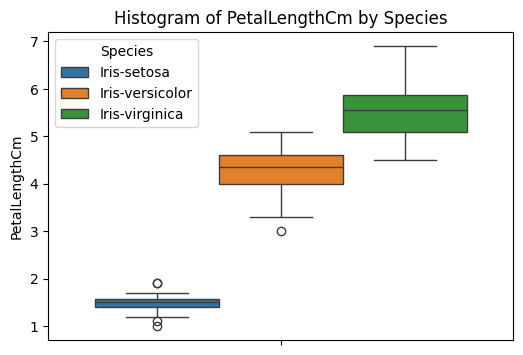

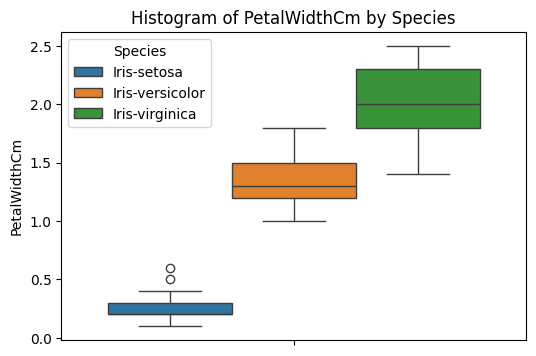

In [20]:
numerical_features = df.select_dtypes(include=['float64'])
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col, hue='Species')
    plt.title(f"Histogram of {col} by Species")
    plt.show()

In [4]:
# Compute IQR for numerical columns (excluding 'Id' and 'Species')
numeric_df = df.drop(columns=["Id", "Species"])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = numeric_df[(numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))]

numeric_df = numeric_df[(numeric_df >= (Q1 - 1.5 * IQR)) & (numeric_df < (Q3 + 1.5 * IQR))]

print("Outlier values per feature:")
print(outliers.dropna(how='all'))

Outlier values per feature:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
15            NaN           4.4            NaN           NaN
32            NaN           4.1            NaN           NaN
33            NaN           4.2            NaN           NaN
60            NaN           2.0            NaN           NaN
